In [44]:
import xarray as xa
import rioxarray as rxa
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from glob import glob
from os.path import join
import scipy

In [40]:
def amp2dB (amp):
    return 20 * np.log10(amp)

In [113]:
ds = xa.open_dataset('/Users/zachkeskinen/Documents/uavsar/data/dc_lidar/ds-lidar-us5.nc')
ds = ds.drop('spatial_ref')
df = ds.to_dataframe()
df = df.reset_index(level=[0,1])

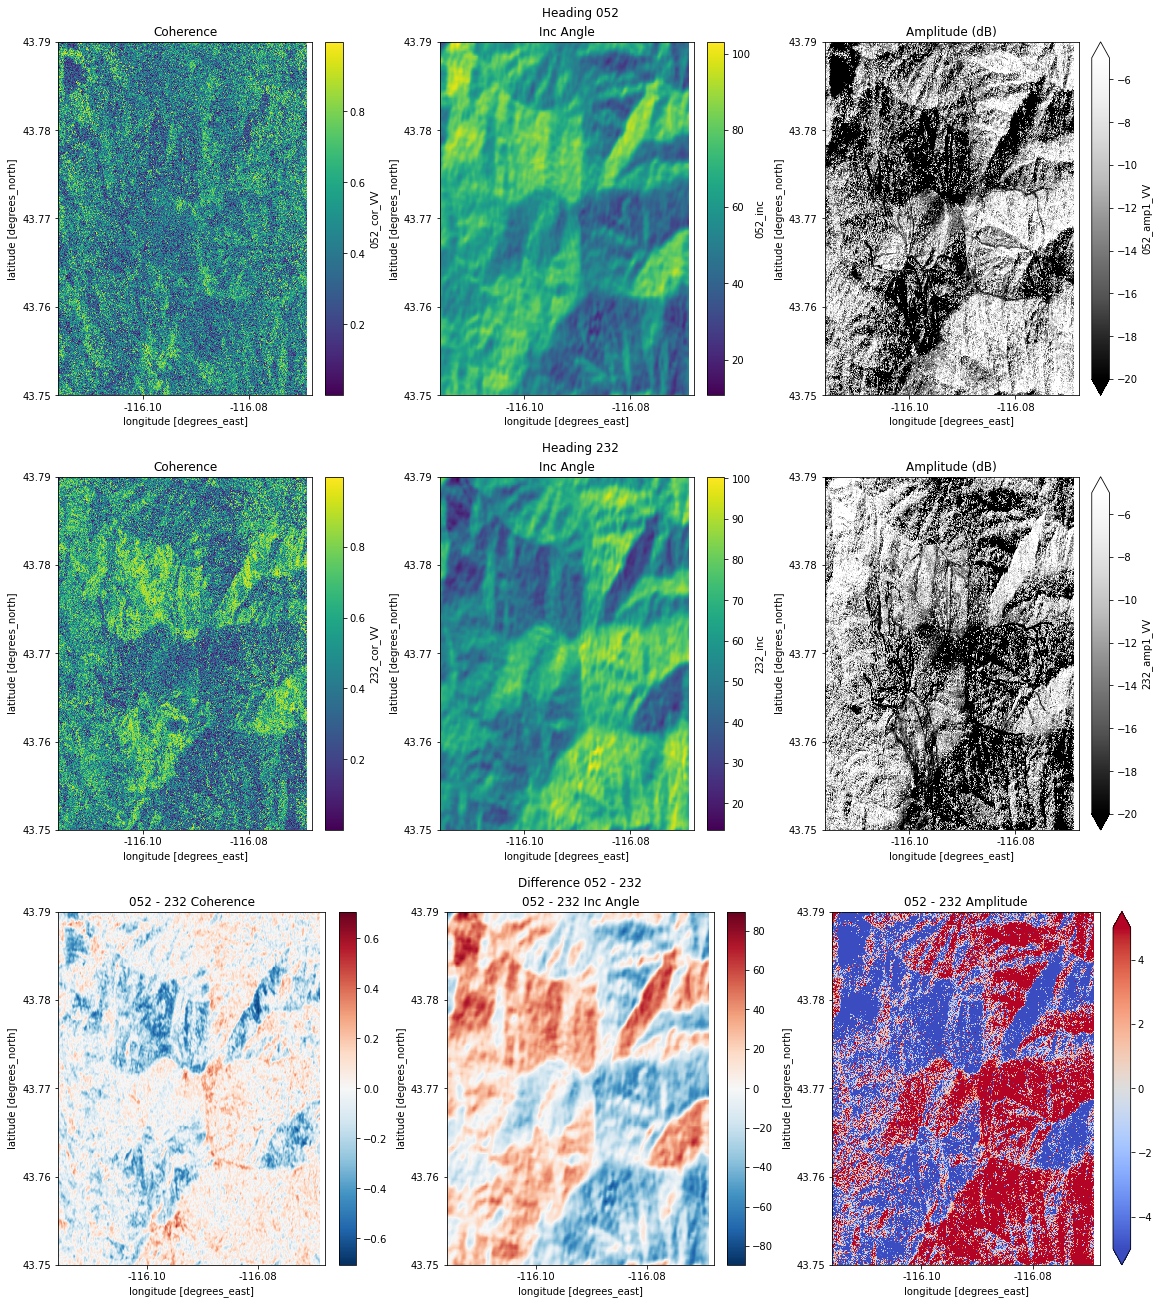

In [114]:
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter

dirs = {0 : '052', 1: '232'}
fig = plt.figure(constrained_layout=True, figsize=(16,18))

# fig.suptitle('Figure title')
# create 3x1 subfigs
subfigs = fig.subfigures(nrows=3, ncols=1)

for row, subfig in enumerate(subfigs):
    if row == 0 or row == 1:
        dir = dirs[row]
        subfig.suptitle(f'Heading {dir}')
    else:
        subfig.suptitle('Difference 052 - 232')



    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    for col, ax in enumerate(axs):
        if row <2:
            if col == 0:
                ds[f'{dir}_cor_VV'].plot(ax = ax)
                ax.set_title('Coherence')
            elif col == 1:
                np.rad2deg(ds[f'{dir}_inc']).plot(ax = ax)
                ax.set_title('Inc Angle')
            elif col == 2:
                amp2dB(ds[f'{dir}_amp1_VV']).plot(vmax = -5, vmin = -20, cmap = 'Greys_r', ax = ax)
                ax.set_title('Amplitude (dB)')
        else:
            if col == 0:
                cor_dif_smo = scipy.ndimage.gaussian_filter(ds['052_cor_VV']- ds['232_cor_VV'], 2)
                cor_dif_smo = xa.DataArray(cor_dif_smo, coords = ds['052_cor_VV'].coords)
                cor_dif_smo.plot(ax = ax)
                ax.set_title('052 - 232 Coherence')
            if col == 1:
                (np.rad2deg(ds['052_inc']) - np.rad2deg(ds['232_inc'])).plot(ax = ax)
                ax.set_title('052 - 232 Inc Angle')
            if col == 2:
                (amp2dB(ds['052_amp1_VV']) - amp2dB(ds['232_amp1_VV'])).plot(vmax = 5, vmin = -5, ax = ax, cmap = 'coolwarm')
                ax.set_title('052 - 232 Amplitude')
        # ax.set_xlabel('Longitude')
        # ax.set_ylabel('Latitude')
        ax.set_xlim([-116.12, -116.06])
        ax.set_ylim([43.75, 43.79])
        ax.xaxis.get_major_locator().set_params(nbins = 3, integer=True)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.yaxis.get_major_locator().set_params(nbins = 4, integer=True)
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# plt.tight_layout()